# Transformações dos Dados

In [345]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

## Dados de Respostas do POSCOMP

In [346]:
dados_respostas_notas_2016 = pd.read_csv('dados/notas_poscomp/dados_notasRespostas_2016.csv')
dados_respostas_notas_2017 = pd.read_csv('dados/notas_poscomp/dados_notasRespostas_2017.csv')
dados_respostas_notas_2018 = pd.read_csv('dados/notas_poscomp/dados_notasRespostas_2018.csv')
dados_respostas_notas_2019 = pd.read_csv('dados/notas_poscomp/dados_notasRespostas_2019.csv')
dados_homologacao = pd.read_csv('dados/homologação_poscomp/dados_homologacao_PROCESSADA.csv')
dados_respostas = pd.read_csv('dados/respostas_poscomp/dados_respostas_PROCESSADA.csv')

In [347]:
dados_respostas_notas_2016 = dados_respostas_notas_2016.drop(columns=['Unnamed: 0'])
dados_respostas_notas_2017 = dados_respostas_notas_2017.drop(columns=['Unnamed: 0'])
dados_respostas_notas_2018 = dados_respostas_notas_2018.drop(columns=['Unnamed: 0'])
dados_respostas_notas_2019 = dados_respostas_notas_2019.drop(columns=['Unnamed: 0'])
#dados_homologacao = dados_homologacao.drop(columns=['Unnamed: 0'])

In [348]:
#dados_respostas_notas_2016.describe()

## Dados Homologados

In [349]:
#dados_homologacao = dados_homologacao.drop(columns=['Unnamed: 0'])

In [350]:
dados_homologacao.shape

(14573, 12)

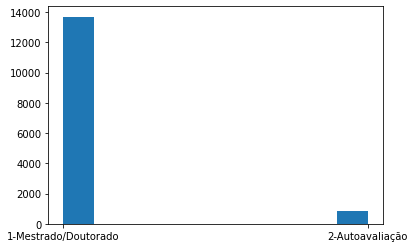

In [351]:
plt.hist(x = dados_homologacao['CARGO']);

In [352]:
# Candidatos do estado do Pará dos anos de 2016 a 2019
candidatos_pa = dados_homologacao[dados_homologacao['ESTADO'] == 'PA']

In [353]:
# Candidatos dos demais estados
dados_homologados_estados = dados_homologacao.copy()
dados_homologados_estados.drop(dados_homologados_estados.loc[dados_homologados_estados['ESTADO']=='PA'].index, inplace=True)

In [354]:
dados_homologados_estados

,INSCRICAO,SEXO,ENDERECO.,NUMERO,BAIRRO,CIDADE,ESTADO,CEP,CARGO,CÓDIGO,LOCAL DE PROVA,ANO
0,39401673171-6,M,Pampas de Polanco,16,Ramiro Priale,Arequipa,OU,05105-1,1-Mestrado/Doutorado,1,Arequipa - PERU,2016
1,39401645886-1,M,Mário Studart,380,Jacarecanga,Fortaleza,CE,60326-060,1-Mestrado/Doutorado,1,Fortaleza - CE,2016
2,39401663587-8,M,Avenida da Azenha,324,Azenha,Porto Alegre,RS,90160004,1-Mestrado/Doutorado,1,Campina Grande - PB,2016
3,39401651770-6,M,Gregório Aversa,450,Recreio São Judas Tadeu,São Carlos,SP,13571-260,1-Mestrado/Doutorado,1,São Carlos - SP,2016
5,39402640298-8,M,João Batista S de Oliveira,201,Vista Alegre,Cuiabá,MT,78085-712,2-Autoavaliação,2,Cuiabá - MT,2016
...,...,...,...,...,...,...,...,...,...,...,...,...
14568,51801396055-5,M,Rua Piratininga,33,Praia da Costa,Vila Velha,ES,29101-220,1-Mestrado/Doutorado,1,Vitória/ES,2019
14569,51801354647-6,M,Avenida São Francisco de Paula,2138,Areal,Pelotas,RS,96080-730,1-Mestrado/Doutorado,1,Pelotas/RS,2019
14570,51801393821-0,M,jv tablon del niño jesus - san jeronimo,328,san jeronimo,cusco,OU,08000-,1-Mestrado/Doutorado,1,Arequipa/PERU,2019
14571,51801354273-1,M,Rua Onófrio Lemos,114,Ibirapuitã,Alegrete,RS,97546260,1-Mestrado/Doutorado,1,Alegrete/RS,2019


In [355]:
#Pegar os candidatos que residem no estado do Pará
dados_notasPA_2016 = dados_respostas_notas_2016.loc[dados_respostas_notas_2016['INSCRICAO'].
                                                    isin(candidatos_pa['INSCRICAO'])].reset_index(drop=True)
#Pegar os candidatos que residem no estado do Pará
dados_notasPA_2017 = dados_respostas_notas_2017.loc[dados_respostas_notas_2017['INSCRICAO'].
                                                    isin(candidatos_pa['INSCRICAO'])].reset_index(drop=True)
#Pegar os candidatos que residem no estado do Pará
dados_notasPA_2018 = dados_respostas_notas_2018.loc[dados_respostas_notas_2018['INSCRICAO'].
                                                    isin(candidatos_pa['INSCRICAO'])].reset_index(drop=True)
#Pegar os candidatos que residem no estado do Pará
dados_notasPA_2019 = dados_respostas_notas_2019.loc[dados_respostas_notas_2019['INSCRICAO'].
                                                    isin(candidatos_pa['INSCRICAO'])].reset_index(drop=True)

In [356]:
#Pegar os candidatos que residem nos demais estados
dados_notasEstados_2016 = dados_respostas_notas_2016.loc[~dados_respostas_notas_2016['INSCRICAO'].
                                                    isin(candidatos_pa['INSCRICAO'])].reset_index(drop=True)
#Pegar os candidatos que residem nos demais estados
dados_notasEstados_2017 = dados_respostas_notas_2017.loc[~dados_respostas_notas_2017['INSCRICAO'].
                                                    isin(candidatos_pa['INSCRICAO'])].reset_index(drop=True)
#Pegar os candidatos que residem nos demais estados
dados_notasEstados_2018 = dados_respostas_notas_2018.loc[~dados_respostas_notas_2018['INSCRICAO'].
                                                    isin(candidatos_pa['INSCRICAO'])].reset_index(drop=True)
#Pegar os candidatos que residem nos demais estados
dados_notasEstados_2019 = dados_respostas_notas_2019.loc[~dados_respostas_notas_2019['INSCRICAO'].
                                                    isin(candidatos_pa['INSCRICAO'])].reset_index(drop=True)

In [357]:
dados_notasPA_2016 = dados_notasPA_2016.drop(columns=['CARGO', 'ESPECIALIDADE', 'INSCRICAO', 'IDENTIFICADOR', 'NOTA TOTAL TO'])
dados_notasPA_2017 = dados_notasPA_2017.drop(columns=['CARGO', 'ESPECIALIDADE', 'INSCRICAO', 'IDENTIFICADOR', 'NOTA TOTAL TO'])
dados_notasPA_2018 = dados_notasPA_2018.drop(columns=['CARGO', 'ESPECIALIDADE', 'INSCRICAO', 'IDENTIFICADOR', 'NOTA TOTAL TO'])
dados_notasPA_2019 = dados_notasPA_2019.drop(columns=['CARGO', 'ESPECIALIDADE', 'INSCRICAO', 'IDENTIFICADOR', 'NOTA TOTAL TO'])

In [358]:
dados_notasEstados_2016 = dados_notasEstados_2016.drop(columns=['CARGO', 'ESPECIALIDADE', 'INSCRICAO', 'IDENTIFICADOR', 'NOTA TOTAL TO'])
dados_notasEstados_2017 = dados_notasEstados_2017.drop(columns=['CARGO', 'ESPECIALIDADE', 'INSCRICAO', 'IDENTIFICADOR', 'NOTA TOTAL TO'])
dados_notasEstados_2018 = dados_notasEstados_2018.drop(columns=['CARGO', 'ESPECIALIDADE', 'INSCRICAO', 'IDENTIFICADOR', 'NOTA TOTAL TO'])
dados_notasEstados_2019 = dados_notasEstados_2019.drop(columns=['CARGO', 'ESPECIALIDADE', 'INSCRICAO', 'IDENTIFICADOR', 'NOTA TOTAL TO'])

In [359]:
#dados_notas = pd.concat([dados_notasPA_2016, dados_notasPA_2017, dados_notasPA_2018, dados_notasPA_2019], axis=0)
list(dados_notasPA_2016.columns)

['NOTA Matemática Discreta',
 'NOTA Cálculo Diferencial Integral',
 'NOTA Álgebra Linear',
 'NOTA Geometria Analítica',
 'NOTA Análise Combinatória',
 'NOTA Probabilidade e Estatística',
 'NOTA Lógica Matemática',
 'NOTA Organização de Arquivos e Dados',
 'NOTA Técnicas de Programação',
 'NOTA Circuitos Digitais',
 'NOTA Análise de Algoritmos',
 'NOTA Teoria dos Grafos',
 'NOTA Linguagens Formais, Autômatos e Computabilidade',
 'NOTA Algoritmos e Estruturas de Dados',
 'NOTA Linguagens de Programação',
 'NOTA Sistemas Operacionais',
 'NOTA Arquitetura e Organização de Computadores',
 'NOTA Rede de Computadores',
 'NOTA Computação Gráfica',
 'NOTA Inteligência Artificial',
 'NOTA Engenharia de Software',
 'NOTA Sistemas Distribuídos',
 'NOTA Compiladores',
 'NOTA Processamento de Imagens',
 'NOTA Banco de Dados']

In [360]:
dados_notasPA_2016 = dados_notasPA_2016.rename(columns={'NOTA Matemática Discreta':'Matemática Discreta',
                                 'NOTA Cálculo Diferencial Integral':'Cálculo Diferencial e Integral',
                                 'NOTA Álgebra Linear':'Álgebra Linear',
                                 'NOTA Geometria Analítica':'Geometria Analítica',
                                 'NOTA Análise Combinatória':'Análise Combinatória',
                                 'NOTA Probabilidade e Estatística':'Probabilidade e Estatística',
                                 'NOTA Lógica Matemática':'Lógica Matemática',
                                 'NOTA Organização de Arquivos e Dados':'Organização de Arquivos e Dados',
                                 'NOTA Técnicas de Programação':'Técnicas de Programação',
                                 'NOTA Circuitos Digitais':'Circuitos Digitais',
                                 'NOTA Análise de Algoritmos':'Análise de Algoritmos',
                                 'NOTA Teoria dos Grafos':'Teoria dos Grafos',
                                 'NOTA Linguagens Formais, Autômatos e Computabilidade':'Linguagens Formais, Autômatos e Computabilidade',
                                 'NOTA Algoritmos e Estruturas de Dados':'Algoritmos e Estruturas de Dados',
                                 'NOTA Linguagens de Programação':'Linguagens de Programação',
                                 'NOTA Sistemas Operacionais':'Sistemas Operacionais',
                                 'NOTA Arquitetura e Organização de Computadores':'Arquitetura e Organização de Computadores',
                                 'NOTA Rede de Computadores':'Redes de Computadores',
                                 'NOTA Computação Gráfica':'Computação Gráfica',
                                 'NOTA Inteligência Artificial':'Inteligência Artificial',
                                 'NOTA Engenharia de Software':'Engenharia de Software',
                                 'NOTA Sistemas Distribuídos':'Sistemas Distribuídos',
                                 'NOTA Compiladores':'Compiladores',
                                 'NOTA Processamento de Imagens':'Processamento de Imagens',
                                 'NOTA Banco de Dados':'Banco de Dados'})

In [361]:
dados_notasEstados_2016 = dados_notasEstados_2016.rename(columns={'NOTA Matemática Discreta':'Matemática Discreta',
                                 'NOTA Cálculo Diferencial Integral':'Cálculo Diferencial e Integral',
                                 'NOTA Álgebra Linear':'Álgebra Linear',
                                 'NOTA Geometria Analítica':'Geometria Analítica',
                                 'NOTA Análise Combinatória':'Análise Combinatória',
                                 'NOTA Probabilidade e Estatística':'Probabilidade e Estatística',
                                 'NOTA Lógica Matemática':'Lógica Matemática',
                                 'NOTA Organização de Arquivos e Dados':'Organização de Arquivos e Dados',
                                 'NOTA Técnicas de Programação':'Técnicas de Programação',
                                 'NOTA Circuitos Digitais':'Circuitos Digitais',
                                 'NOTA Análise de Algoritmos':'Análise de Algoritmos',
                                 'NOTA Teoria dos Grafos':'Teoria dos Grafos',
                                 'NOTA Linguagens Formais, Autômatos e Computabilidade':'Linguagens Formais, Autômatos e Computabilidade',
                                 'NOTA Algoritmos e Estruturas de Dados':'Algoritmos e Estruturas de Dados',
                                 'NOTA Linguagens de Programação':'Linguagens de Programação',
                                 'NOTA Sistemas Operacionais':'Sistemas Operacionais',
                                 'NOTA Arquitetura e Organização de Computadores':'Arquitetura e Organização de Computadores',
                                 'NOTA Rede de Computadores':'Redes de Computadores',
                                 'NOTA Computação Gráfica':'Computação Gráfica',
                                 'NOTA Inteligência Artificial':'Inteligência Artificial',
                                 'NOTA Engenharia de Software':'Engenharia de Software',
                                 'NOTA Sistemas Distribuídos':'Sistemas Distribuídos',
                                 'NOTA Compiladores':'Compiladores',
                                 'NOTA Processamento de Imagens':'Processamento de Imagens',
                                 'NOTA Banco de Dados':'Banco de Dados'})

In [362]:
dados_notasPA_2017 = dados_notasPA_2017.rename(columns={'NOTA Matemática Discreta':'Matemática Discreta',
                                 'NOTA Cálculo Diferencial e Integral':'Cálculo Diferencial e Integral',
                                 'NOTA Algebra Linear':'Álgebra Linear',
                                 'NOTA Geometria Analítica':'Geometria Analítica',
                                 'NOTA Análise Combinatória':'Análise Combinatória',
                                 'NOTA Probabilidade e Estatística':'Probabilidade e Estatística',
                                 'NOTA Lógica Matemática':'Lógica Matemática',
                                 'NOTA Organização de Arquivos e Dados':'Organização de Arquivos e Dados',
                                 'NOTA Técnicas de Programação':'Técnicas de Programação',
                                 'NOTA Circuitos Digitais':'Circuitos Digitais',
                                 'NOTA Análise de Algorítmos':'Análise de Algoritmos',
                                 'NOTA Teoria dos Grafos':'Teoria dos Grafos',
                                 'NOTA Linguagens Formais, Autômatos e Computabilidade':'Linguagens Formais, Autômatos e Computabilidade',
                                 'NOTA Algorítmos e Estrutura de Dados':'Algoritmos e Estruturas de Dados',
                                 'NOTA Linguagens de Programação':'Linguagens de Programação',
                                 'NOTA Sistemas Operacionais':'Sistemas Operacionais',
                                 'NOTA Arquitetura e Organização de Computadores':'Arquitetura e Organização de Computadores',
                                 'NOTA Redes de Computadores':'Redes de Computadores',
                                 'NOTA Computação Gráfica':'Computação Gráfica',
                                 'NOTA Inteligência Artificial':'Inteligência Artificial',
                                 'NOTA Engenharia de Software':'Engenharia de Software',
                                 'NOTA Sistemas Distribuídos':'Sistemas Distribuídos',
                                 'NOTA Compiladores':'Compiladores',
                                 'NOTA Processamento de Imagens':'Processamento de Imagens',
                                 'NOTA Banco de Dados':'Banco de Dados'})

In [363]:
dados_notasEstados_2017 = dados_notasEstados_2017.rename(columns={'NOTA Matemática Discreta':'Matemática Discreta',
                                 'NOTA Cálculo Diferencial e Integral':'Cálculo Diferencial e Integral',
                                 'NOTA Algebra Linear':'Álgebra Linear',
                                 'NOTA Geometria Analítica':'Geometria Analítica',
                                 'NOTA Análise Combinatória':'Análise Combinatória',
                                 'NOTA Probabilidade e Estatística':'Probabilidade e Estatística',
                                 'NOTA Lógica Matemática':'Lógica Matemática',
                                 'NOTA Organização de Arquivos e Dados':'Organização de Arquivos e Dados',
                                 'NOTA Técnicas de Programação':'Técnicas de Programação',
                                 'NOTA Circuitos Digitais':'Circuitos Digitais',
                                 'NOTA Análise de Algorítmos':'Análise de Algoritmos',
                                 'NOTA Teoria dos Grafos':'Teoria dos Grafos',
                                 'NOTA Linguagens Formais, Autômatos e Computabilidade':'Linguagens Formais, Autômatos e Computabilidade',
                                 'NOTA Algorítmos e Estrutura de Dados':'Algoritmos e Estruturas de Dados',
                                 'NOTA Linguagens de Programação':'Linguagens de Programação',
                                 'NOTA Sistemas Operacionais':'Sistemas Operacionais',
                                 'NOTA Arquitetura e Organização de Computadores':'Arquitetura e Organização de Computadores',
                                 'NOTA Redes de Computadores':'Redes de Computadores',
                                 'NOTA Computação Gráfica':'Computação Gráfica',
                                 'NOTA Inteligência Artificial':'Inteligência Artificial',
                                 'NOTA Engenharia de Software':'Engenharia de Software',
                                 'NOTA Sistemas Distribuídos':'Sistemas Distribuídos',
                                 'NOTA Compiladores':'Compiladores',
                                 'NOTA Processamento de Imagens':'Processamento de Imagens',
                                 'NOTA Banco de Dados':'Banco de Dados'})

In [364]:
dados_notasPA_2018 = dados_notasPA_2018.rename(columns={'NOTA Matemática Discreta':'Matemática Discreta',
                                 'NOTA Cálculo Diferencial e Integral':'Cálculo Diferencial e Integral',
                                 'NOTA Algebra Linear':'Álgebra Linear',
                                 'NOTA Geometria Analítica':'Geometria Analítica',
                                 'NOTA Analise Combinatória':'Análise Combinatória',
                                 'NOTA Probabilidade e Estatística':'Probabilidade e Estatística',
                                 'NOTA Lógica Matemática':'Lógica Matemática',
                                 'NOTA Organização de Arquivos e Dados':'Organização de Arquivos e Dados',
                                 'NOTA Técnicas de Programação':'Técnicas de Programação',
                                 'NOTA Circuitos Digitais':'Circuitos Digitais',
                                 'NOTA Análise de Algoritmos':'Análise de Algoritmos',
                                 'NOTA Teoria dos Grafos':'Teoria dos Grafos',
                                 'NOTA Linguagens formais, autômatos e Computabilidade':'Linguagens Formais, Autômatos e Computabilidade',
                                 'NOTA Algorítmos e Estrutura de Dados':'Algoritmos e Estruturas de Dados',
                                 'NOTA Linguagens de Programação':'Linguagens de Programação',
                                 'NOTA Sistemas Operacionais':'Sistemas Operacionais',
                                 'NOTA Arquitetura e Organização de Computadores':'Arquitetura e Organização de Computadores',
                                 'NOTA Redes de Computadores':'Redes de Computadores',
                                 'NOTA Computação Gráfica':'Computação Gráfica',
                                 'NOTA Inteligência Artificial':'Inteligência Artificial',
                                 'NOTA Engenharia de Software':'Engenharia de Software',
                                 'NOTA Sistemas Distribuídos':'Sistemas Distribuídos',
                                 'NOTA Compiladores':'Compiladores',
                                 'NOTA Processamento de Imagens':'Processamento de Imagens',
                                 'NOTA Banco de Dados':'Banco de Dados'})

In [365]:
dados_notasEstados_2018 = dados_notasEstados_2018.rename(columns={'NOTA Matemática Discreta':'Matemática Discreta',
                                 'NOTA Cálculo Diferencial e Integral':'Cálculo Diferencial e Integral',
                                 'NOTA Algebra Linear':'Álgebra Linear',
                                 'NOTA Geometria Analítica':'Geometria Analítica',
                                 'NOTA Analise Combinatória':'Análise Combinatória',
                                 'NOTA Probabilidade e Estatística':'Probabilidade e Estatística',
                                 'NOTA Lógica Matemática':'Lógica Matemática',
                                 'NOTA Organização de Arquivos e Dados':'Organização de Arquivos e Dados',
                                 'NOTA Técnicas de Programação':'Técnicas de Programação',
                                 'NOTA Circuitos Digitais':'Circuitos Digitais',
                                 'NOTA Análise de Algoritmos':'Análise de Algoritmos',
                                 'NOTA Teoria dos Grafos':'Teoria dos Grafos',
                                 'NOTA Linguagens formais, autômatos e Computabilidade':'Linguagens Formais, Autômatos e Computabilidade',
                                 'NOTA Algorítmos e Estrutura de Dados':'Algoritmos e Estruturas de Dados',
                                 'NOTA Linguagens de Programação':'Linguagens de Programação',
                                 'NOTA Sistemas Operacionais':'Sistemas Operacionais',
                                 'NOTA Arquitetura e Organização de Computadores':'Arquitetura e Organização de Computadores',
                                 'NOTA Redes de Computadores':'Redes de Computadores',
                                 'NOTA Computação Gráfica':'Computação Gráfica',
                                 'NOTA Inteligência Artificial':'Inteligência Artificial',
                                 'NOTA Engenharia de Software':'Engenharia de Software',
                                 'NOTA Sistemas Distribuídos':'Sistemas Distribuídos',
                                 'NOTA Compiladores':'Compiladores',
                                 'NOTA Processamento de Imagens':'Processamento de Imagens',
                                 'NOTA Banco de Dados':'Banco de Dados'})

In [366]:
dados_notasPA_2019 = dados_notasPA_2019.rename(columns={'NOTA Matemática Discreta':'Matemática Discreta',
                                 'NOTA Calculo Diferencial e Integral':'Cálculo Diferencial e Integral',
                                 'NOTA Álgebra Linear':'Álgebra Linear',
                                 'NOTA Geometria Analítica':'Geometria Analítica',
                                 'NOTA Análise Combinatória':'Análise Combinatória',
                                 'NOTA Probabilidade e Estatística':'Probabilidade e Estatística',
                                 'NOTA Lógica Matemática':'Lógica Matemática',
                                 'NOTA Organização de Arquivos e Dados':'Organização de Arquivos e Dados',
                                 'NOTA Técnicas de Programação':'Técnicas de Programação',
                                 'NOTA Circuitos Digitais':'Circuitos Digitais',
                                 'NOTA Análise de Algoritmos':'Análise de Algoritmos',
                                 'NOTA Teoria dos Grafos':'Teoria dos Grafos',
                                 'NOTA Linguagens formais, autômatos e Computabilidade':'Linguagens Formais, Autômatos e Computabilidade',
                                 'NOTA Algoritmos e Estrutura de Dados':'Algoritmos e Estruturas de Dados',
                                 'NOTA Linguagens de Programação':'Linguagens de Programação',
                                 'NOTA Sistemas Operacionais':'Sistemas Operacionais',
                                 'NOTA Arquitetura e Organização de Computadores':'Arquitetura e Organização de Computadores',
                                 'NOTA Redes de Computadores':'Redes de Computadores',
                                 'NOTA Computação Gráfica':'Computação Gráfica',
                                 'NOTA Inteligência Artificial':'Inteligência Artificial',
                                 'NOTA Engenharia de Software':'Engenharia de Software',
                                 'NOTA Sistemas Distribuídos':'Sistemas Distribuídos',
                                 'NOTA Compiladores':'Compiladores',
                                 'NOTA Processamento de Imagens':'Processamento de Imagens',
                                 'NOTA Banco de Dados':'Banco de Dados'})

In [367]:
dados_notasEstados_2019 = dados_notasEstados_2019.rename(columns={'NOTA Matemática Discreta':'Matemática Discreta',
                                 'NOTA Calculo Diferencial e Integral':'Cálculo Diferencial e Integral',
                                 'NOTA Álgebra Linear':'Álgebra Linear',
                                 'NOTA Geometria Analítica':'Geometria Analítica',
                                 'NOTA Análise Combinatória':'Análise Combinatória',
                                 'NOTA Probabilidade e Estatística':'Probabilidade e Estatística',
                                 'NOTA Lógica Matemática':'Lógica Matemática',
                                 'NOTA Organização de Arquivos e Dados':'Organização de Arquivos e Dados',
                                 'NOTA Técnicas de Programação':'Técnicas de Programação',
                                 'NOTA Circuitos Digitais':'Circuitos Digitais',
                                 'NOTA Análise de Algoritmos':'Análise de Algoritmos',
                                 'NOTA Teoria dos Grafos':'Teoria dos Grafos',
                                 'NOTA Linguagens formais, autômatos e Computabilidade':'Linguagens Formais, Autômatos e Computabilidade',
                                 'NOTA Algoritmos e Estrutura de Dados':'Algoritmos e Estruturas de Dados',
                                 'NOTA Linguagens de Programação':'Linguagens de Programação',
                                 'NOTA Sistemas Operacionais':'Sistemas Operacionais',
                                 'NOTA Arquitetura e Organização de Computadores':'Arquitetura e Organização de Computadores',
                                 'NOTA Redes de Computadores':'Redes de Computadores',
                                 'NOTA Computação Gráfica':'Computação Gráfica',
                                 'NOTA Inteligência Artificial':'Inteligência Artificial',
                                 'NOTA Engenharia de Software':'Engenharia de Software',
                                 'NOTA Sistemas Distribuídos':'Sistemas Distribuídos',
                                 'NOTA Compiladores':'Compiladores',
                                 'NOTA Processamento de Imagens':'Processamento de Imagens',
                                 'NOTA Banco de Dados':'Banco de Dados'})

In [368]:
list(dados_notasPA_2018.columns)

['Álgebra Linear',
 'Análise Combinatória',
 'Cálculo Diferencial e Integral',
 'Geometria Analítica',
 'Matemática Discreta',
 'Probabilidade e Estatística',
 'Lógica Matemática',
 'Análise de Algoritmos',
 'Algoritmos e Estruturas de Dados',
 'Arquitetura e Organização de Computadores',
 'Circuitos Digitais',
 'Linguagens de Programação',
 'Linguagens Formais, Autômatos e Computabilidade',
 'Organização de Arquivos e Dados',
 'Sistemas Operacionais',
 'Técnicas de Programação',
 'Teoria dos Grafos',
 'Banco de Dados',
 'Compiladores',
 'Computação Gráfica',
 'Engenharia de Software',
 'Inteligência Artificial',
 'Processamento de Imagens',
 'Redes de Computadores',
 'Sistemas Distribuídos']

In [369]:
#producao.loc[~producao['Id'].isin(base_dados['Id'])].reset_index(drop=True)
#candidatos_pa

In [370]:
dados_notas_2016 = dados_respostas_notas_2016.loc[~dados_respostas_notas_2016['INSCRICAO'].
                                                    isin(candidatos_pa['INSCRICAO'])].reset_index(drop=True)

##### Transformação dos dados (Rotação)

In [371]:
dados_notasPA2016 = dados_notasPA_2016.copy()
dados_notasPA2016 = dados_notasPA2016.T.reset_index().reindex()
dados_notasPA2016 = dados_notasPA2016.sort_values('index')
dados_notasPA2016 = dados_notasPA2016.set_index('index')

In [372]:
dados_notasPA2016 = dados_notasPA2016.T.reset_index().reindex()

In [373]:
dados_notasPA2017 = dados_notasPA_2017.copy()
dados_notasPA2017 = dados_notasPA2017.T.reset_index().reindex()
dados_notasPA2017 = dados_notasPA2017.sort_values('index')
dados_notasPA2017 = dados_notasPA2017.set_index('index')

In [374]:
dados_notasPA2017 = dados_notasPA2017.T.reset_index().reindex()

In [375]:
dados_notasPA2018 = dados_notasPA_2018.copy()
dados_notasPA2018 = dados_notasPA2018.T.reset_index().reindex()
dados_notasPA2018 = dados_notasPA2018.sort_values('index')
dados_notasPA2018 = dados_notasPA2018.set_index('index')

In [376]:
dados_notasPA2018 = dados_notasPA2018.T.reset_index().reindex()

In [377]:
dados_notasPA2019 = dados_notasPA_2019.copy()
dados_notasPA2019 = dados_notasPA2019.T.reset_index().reindex()
dados_notasPA2019 = dados_notasPA2019.sort_values('index')
dados_notasPA2019 = dados_notasPA2019.set_index('index')

In [378]:
dados_notasPA2019 = dados_notasPA2019.T.reset_index().reindex()

In [379]:
# Retacionar os dados de demais estados
dados_notasEstados2016 = dados_notasEstados_2016.copy()
dados_notasEstados2016 = dados_notasEstados2016.T.reset_index().reindex()
dados_notasEstados2016 = dados_notasEstados2016.sort_values('index')
dados_notasEstados2016 = dados_notasEstados2016.set_index('index')

In [380]:
dados_notasEstados2016 = dados_notasEstados2016.T.reset_index().reindex()

In [381]:
# Retacionar os dados de demais estados
dados_notasEstados2017 = dados_notasEstados_2017.copy()
dados_notasEstados2017 = dados_notasEstados2017.T.reset_index().reindex()
dados_notasEstados2017 = dados_notasEstados2017.sort_values('index')
dados_notasEstados2017 = dados_notasEstados2017.set_index('index')

In [382]:
dados_notasEstados2017 = dados_notasEstados2017.T.reset_index().reindex()

In [383]:
# Retacionar os dados de demais estados
dados_notasEstados2018 = dados_notasEstados_2018.copy()
dados_notasEstados2018 = dados_notasEstados2018.T.reset_index().reindex()
dados_notasEstados2018 = dados_notasEstados2018.sort_values('index')
dados_notasEstados2018 = dados_notasEstados2018.set_index('index')

In [384]:
dados_notasEstados2018 = dados_notasEstados2018.T.reset_index().reindex()

In [385]:
# Retacionar os dados de demais estados
dados_notasEstados2019 = dados_notasEstados_2019.copy()
dados_notasEstados2019 = dados_notasEstados2019.T.reset_index().reindex()
dados_notasEstados2019 = dados_notasEstados2019.sort_values('index')
dados_notasEstados2019 = dados_notasEstados2019.set_index('index')

In [386]:
dados_notasEstados2019 = dados_notasEstados2019.T.reset_index().reindex()

In [387]:
#Juntar os DataFrame de todos os candidatos residentes no estado do Pará
dados_notasPA = pd.concat([dados_notasPA2016, dados_notasPA2017, dados_notasPA2018, dados_notasPA2019], axis=0)
dados_notasEstados = pd.concat([dados_notasEstados2016, dados_notasEstados2017, dados_notasEstados2018, dados_notasEstados2019], axis=0)
dados_notasPA = dados_notasPA.drop(columns=['index'])
dados_notasEstados = dados_notasEstados.drop(columns=['index'])

In [388]:
dados_notasEstados

index,Algoritmos e Estruturas de Dados,Análise Combinatória,Análise de Algoritmos,Arquitetura e Organização de Computadores,Banco de Dados,Circuitos Digitais,Compiladores,Computação Gráfica,Cálculo Diferencial e Integral,Engenharia de Software,...,Matemática Discreta,Organização de Arquivos e Dados,Probabilidade e Estatística,Processamento de Imagens,Redes de Computadores,Sistemas Distribuídos,Sistemas Operacionais,Teoria dos Grafos,Técnicas de Programação,Álgebra Linear
0,3.0,2.0,3.0,1.0,2.0,1.0,0.0,0.0,3.0,0.0,...,3.0,0.0,1.0,2.0,1.0,3.0,0.0,2.0,3.0,3.0
1,1.0,1.0,1.0,1.0,1.0,3.0,1.0,0.0,3.0,3.0,...,3.0,2.0,2.0,1.0,1.0,2.0,2.0,3.0,3.0,2.0
2,3.0,2.0,2.0,1.0,1.0,2.0,1.0,0.0,2.0,1.0,...,3.0,1.0,2.0,2.0,2.0,3.0,2.0,3.0,3.0,3.0
3,1.0,0.0,2.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,2.0,1.0,2.0,2.0,2.0,3.0,1.0
4,0.0,3.0,1.0,0.0,1.0,3.0,2.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,1.0,2.0,2.0,1.0,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2751,3.0,1.0,2.0,0.0,0.0,1.0,0.0,1.0,2.0,0.0,...,1.0,0.0,1.0,1.0,1.0,2.0,2.0,1.0,3.0,2.0
2752,3.0,1.0,2.0,1.0,0.0,1.0,0.0,1.0,2.0,0.0,...,3.0,0.0,1.0,1.0,0.0,1.0,1.0,3.0,3.0,2.0
2753,1.0,0.0,1.0,0.0,2.0,0.0,0.0,1.0,2.0,0.0,...,2.0,0.0,1.0,1.0,0.0,1.0,1.0,2.0,3.0,3.0
2754,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


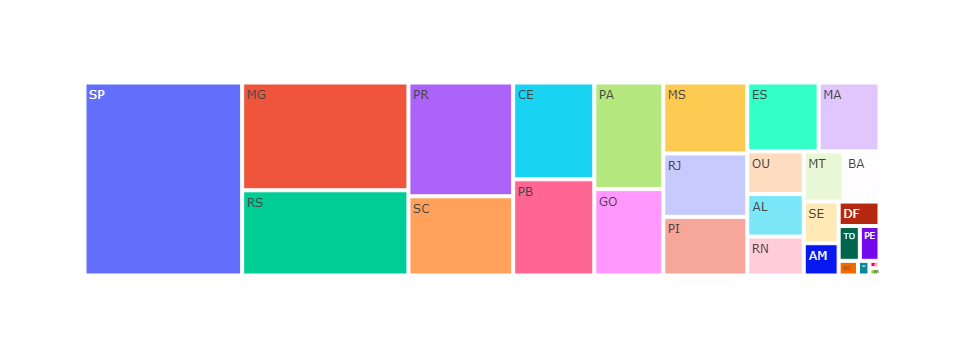

In [389]:
grafico_estado = px.treemap(dados_homologacao, path=['ESTADO'])
grafico_estado.show()

In [390]:
estados_brazil = dados_homologacao[['ESTADO']]

In [391]:
freq = estados_brazil.groupby(['ESTADO']).size()

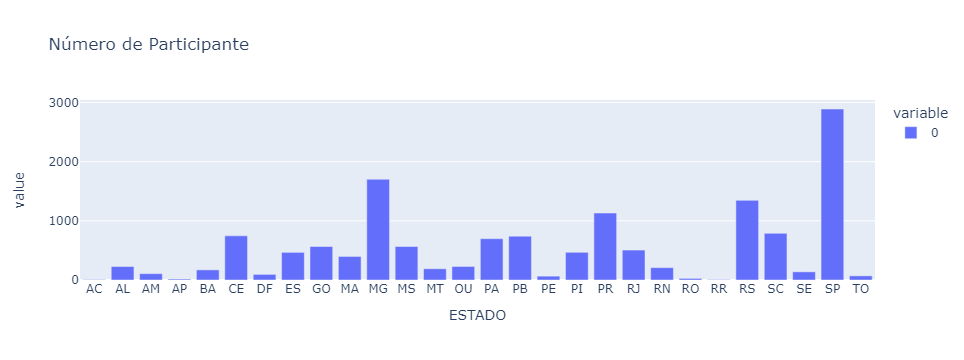

In [392]:
grafico_estadoBrasil = px.bar(freq, title='Número de Participante')
grafico_estadoBrasil.update_traces(textfont_size=12, textangle=0, textposition="outside", cliponaxis=False)
grafico_estadoBrasil.show()

#### Análise de dados dos candidatos de 2016 a 2019 que residem no Pará

In [393]:
dados_PA_media = dados_notasPA.mean().sort_values()

In [394]:
dados_PA_nome = dados_PA_media.keys()

In [395]:
media = dados_PA_media.mean()
media_nacional = dados_notasEstados.mean()

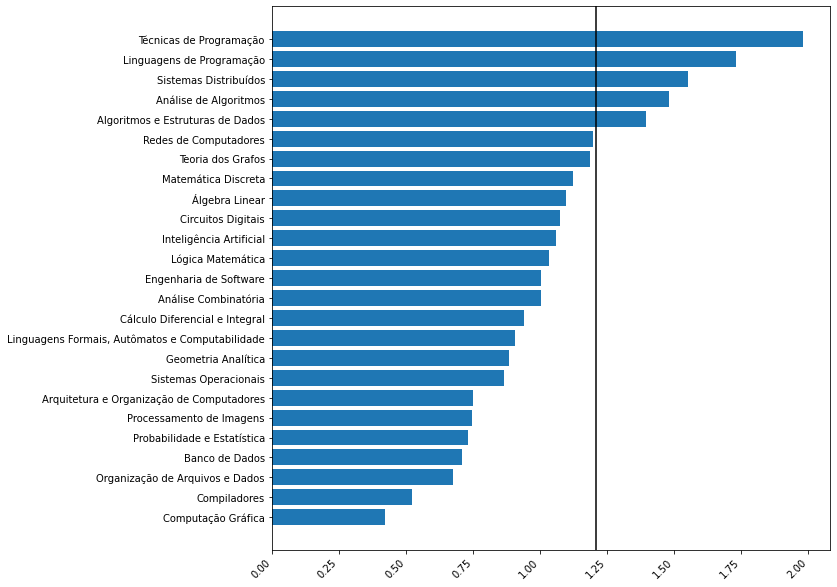

In [396]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.barh(dados_PA_nome, dados_PA_media)
labels = ax.get_xticklabels()
plt.setp(labels, rotation=45, horizontalalignment='right')

ax.axvline(media_nacional.mean(), ls='-', color='black')

plt.show()

In [397]:
candidatos_pa['ANO'].value_counts()

2017    202
2016    199
2018    161
2019    136
Name: ANO, dtype: int64

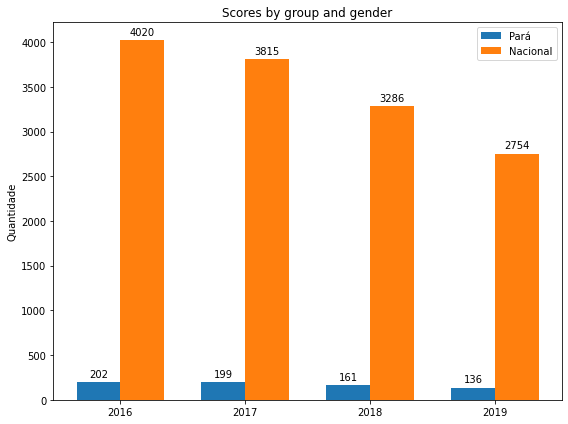

In [398]:
ano = [2016,2017,2018,2019]

x = np.arange(len(ano))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(8,6))
rects1 = ax.bar(x - width/2, candidatos_pa['ANO'].value_counts(), width, label='Pará')
rects2 = ax.bar(x + width/2, dados_homologados_estados['ANO'].value_counts(), width, label='Nacional')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Quantidade')
ax.set_title('Scores by group and gender')
ax.set_xticks(x, ano)
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)

fig.tight_layout()

plt.show()

In [399]:
dados_respostas

,Unnamed: 0,NÚMERO DE INSCRIÇÃO,SITUAÇÃO,1,2,3,4,5,6,7,...,62,63,64,65,66,67,68,69,70,ANO
0,1,39401645886,Presente,B,A,E,C,A,A,C,...,A,C,A,E,C,C,C,C,A,2016
1,2,39401663587,Presente,E,A,B,D,A,A,C,...,A,A,A,E,C,A,C,B,D,2016
2,3,39401651770,Presente,E,E,D,B,D,B,D,...,A,E,E,E,C,A,B,B,C,2016
3,4,39401671273,Presente,B,A,D,C,E,D,B,...,E,E,A,E,C,C,C,A,D,2016
4,5,39402640298,Presente,E,A,D,B,E,B,D,...,A,D,A,E,C,C,C,B,D,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11527,14567,51801394883,Presente,A,B,D,E,E,B,D,...,D,A,C,C,C,E,A,C,A,2019
11528,14568,51801395371,Presente,B,B,D,C,D,B,D,...,E,C,A,A,A,B,C,D,D,2019
11529,14569,51801394300,Presente,C,D,D,E,E,B,D,...,E,B,A,A,C,C,C,C,C,2019
11530,14570,51801396055,Presente,A,B,D,B,C,B,C,...,A,D,A,C,C,E,A,E,E,2019


In [400]:
dados_respostasPA = dados_respostas.loc[dados_respostas['NÚMERO DE INSCRIÇÃO'].
                                        isin(candidatos_pa['INSCRICAO'])].reset_index(drop=True)

In [412]:
dados_respostas

,Unnamed: 0,NÚMERO DE INSCRIÇÃO,SITUAÇÃO,1,2,3,4,5,6,7,...,62,63,64,65,66,67,68,69,70,ANO
0,1,39401645886,Presente,B,A,E,C,A,A,C,...,A,C,A,E,C,C,C,C,A,2016
1,2,39401663587,Presente,E,A,B,D,A,A,C,...,A,A,A,E,C,A,C,B,D,2016
2,3,39401651770,Presente,E,E,D,B,D,B,D,...,A,E,E,E,C,A,B,B,C,2016
3,4,39401671273,Presente,B,A,D,C,E,D,B,...,E,E,A,E,C,C,C,A,D,2016
4,5,39402640298,Presente,E,A,D,B,E,B,D,...,A,D,A,E,C,C,C,B,D,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11527,14567,51801394883,Presente,A,B,D,E,E,B,D,...,D,A,C,C,C,E,A,C,A,2019
11528,14568,51801395371,Presente,B,B,D,C,D,B,D,...,E,C,A,A,A,B,C,D,D,2019
11529,14569,51801394300,Presente,C,D,D,E,E,B,D,...,E,B,A,A,C,C,C,C,C,2019
11530,14570,51801396055,Presente,A,B,D,B,C,B,C,...,A,D,A,C,C,E,A,E,E,2019


In [416]:
dados_respostas[dados_respostas['NÚMERO DE INSCRIÇÃO'] == 39401671273]

,Unnamed: 0,NÚMERO DE INSCRIÇÃO,SITUAÇÃO,1,2,3,4,5,6,7,...,62,63,64,65,66,67,68,69,70,ANO
3,4,39401671273,Presente,B,A,D,C,E,D,B,...,E,E,A,E,C,C,C,A,D,2016


In [402]:
dados_respostasPA.shape

(0, 74)